# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [71]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [9]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9642857142857143
평가 데이터 점수: 0.9736842105263158


In [11]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [12]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.36607142857142855
평가 데이터 점수: 0.23684210526315788


In [13]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.00199533, 0.0009973 , 0.00099754, 0.00199485, 0.00199461]),
 'score_time': array([0.00199437, 0.00199342, 0.00199413, 0.0009973 , 0.00099683]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [17]:
param_grid = [{'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [18]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [19]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [20]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [22]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [31]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [32]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [33]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,24.836798,-2.409325,0
1,22.149652,-3.044577,0
2,22.209377,-1.840646,0
3,21.823406,-2.071391,0
4,24.891912,-1.930143,0
...,...,...,...
145,-19.388729,-0.390298,2
146,-16.091160,-0.396157,2
147,-18.461981,-0.528874,2
148,-19.867062,0.453530,2


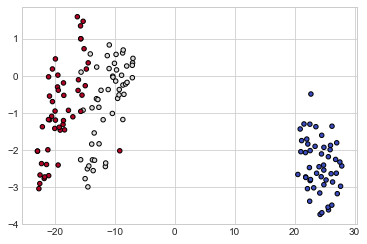

In [34]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [35]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

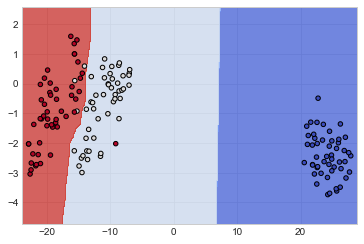

In [36]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 유방암 데이터

In [37]:
cancer = load_breast_cancer()

In [43]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [52]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [54]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9413145539906104
평가 데이터 점수: 0.9440559440559441


In [56]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [57]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3732394366197183
평가 데이터 점수: 0.3706293706293706


In [58]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.0019896 , 0.00099754, 0.00099826, 0.0009973 , 0.00099778]),
 'score_time': array([0.00995016, 0.01097083, 0.00997257, 0.01097035, 0.00997257]),
 'test_score': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])}

In [59]:
param_grid = [{'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [60]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [61]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [62]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [63]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9297003570874087


In [64]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [65]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,25.627541,-23.393456,0
1,22.986839,-22.167334,0
2,24.634680,-17.476366,0
3,-24.476255,6.772336,0
4,22.913811,-15.750340,0
...,...,...,...
564,21.780136,-23.392723,0
565,23.755453,-18.264984,0
566,24.269739,1.746690,0
567,23.919575,-20.098616,0


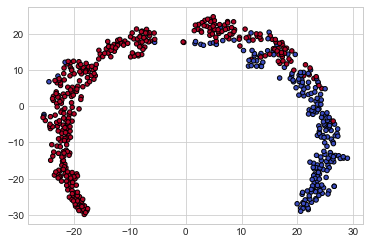

In [66]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [67]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

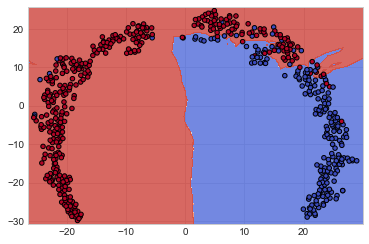

In [69]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## 와인데이터

In [72]:
wine = load_wine()

In [73]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['Target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [74]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [76]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8120300751879699
평가 데이터 점수: 0.7111111111111111


In [78]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [79]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3157894736842105
평가 데이터 점수: 0.37777777777777777


In [80]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.00199509, 0.00299501, 0.00199413, 0.00199437, 0.00199556]),
 'score_time': array([0.00199533, 0.00099516, 0.00199485, 0.00199485, 0.00199389]),
 'test_score': array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857])}

In [81]:
param_grid = [{'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [82]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [83]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [84]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [85]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.7250793650793651


In [86]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [87]:
wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df['Target'] = y
wine_comp_df

,0,1,Target
0,8.987472,-6.879478,0
1,8.542060,-6.850156,0
2,10.541969,-8.510144,0
3,12.853787,-10.257544,0
4,1.706640,-2.019436,0
...,...,...,...
173,1.970317,-1.640934,2
174,2.290182,-1.938750,2
175,4.255269,-3.696257,2
176,4.278257,-3.948129,2


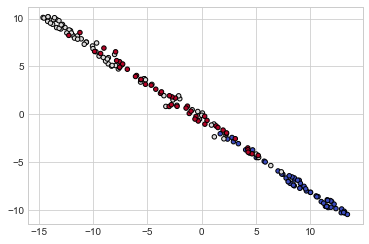

In [88]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [89]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

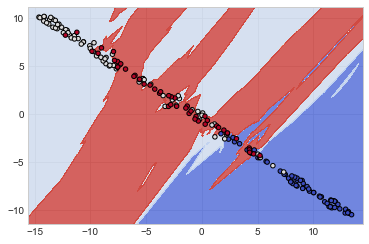

In [90]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [123]:
boston = load_boston()

In [124]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [93]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38,29.1
1,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
2,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
3,0.14103,0.0,13.92,0.0,0.437,5.790,58.0,6.3200,4.0,289.0,16.0,396.90,15.84,20.3
4,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,33.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
400,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
401,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
402,4.81213,0.0,18.10,0.0,0.713,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42,16.4


In [125]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,17.8
1,0.03427,0.0,5.19,0.0,0.515,5.869,46.3,5.2311,5.0,224.0,20.2,396.90,9.80,19.5
2,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
3,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
4,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
98,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53,17.5
99,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8
100,0.78570,20.0,3.97,0.0,0.647,7.014,84.6,2.1329,5.0,264.0,13.0,384.07,14.79,30.7


In [126]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [127]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [128]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7439573043934142
평가 데이터 점수: 0.4133542943449342


In [129]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [130]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8485184958918569
평가 데이터 점수: 0.7269925579321085


In [131]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [132]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.00199509, 0.00199461, 0.00199509, 0.00199509, 0.00099754]),
 'score_time': array([0.00099707, 0.00199509, 0.00099778, 0.00099683, 0.00199413]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [133]:
pipe = Pipeline(
    [('sclaer', StandardScaler()),
    ('model', KNeighborsRegressor())]
)

In [134]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [135]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [136]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('sclaer', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=6,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [137]:
gs.best_estimator_

Pipeline(steps=[('sclaer', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [138]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [139]:
tene = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [140]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,1,Target
0,-4.499949,-2.844136,24.0
1,3.373578,16.068760,21.6
2,1.949335,16.116228,34.7
3,0.620311,18.084827,33.4
4,1.358506,18.168585,36.2
...,...,...,...
501,0.982097,1.408220,22.4
502,1.942467,1.851938,20.6
503,3.023154,2.810327,23.9
504,2.946685,2.677112,22.0


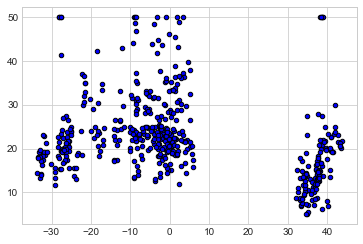

In [141]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [142]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

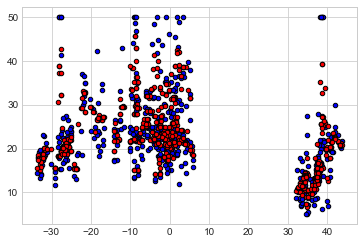

In [143]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp[:, 0], predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [144]:
california = fetch_california_housing()

In [145]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [146]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.5385,36.0,3.675000,0.837500,266.0,3.325000,34.12,-117.93,1.344
1,1.8750,33.0,14.777778,3.222222,71.0,2.629630,34.30,-117.18,0.713
2,5.0201,18.0,5.601336,0.986637,1442.0,3.211581,32.82,-116.89,1.544
3,3.7500,28.0,5.136247,1.064267,1124.0,2.889460,34.11,-117.77,1.809
4,4.6905,52.0,5.751174,1.015649,1553.0,2.430360,37.98,-122.58,3.163
...,...,...,...,...,...,...,...,...,...
16507,3.3469,30.0,3.280599,1.018229,2129.0,1.386068,37.58,-122.35,3.450
16508,2.1818,46.0,5.511785,1.138047,714.0,2.404040,35.37,-119.04,0.753
16509,2.2788,28.0,4.792627,0.983871,1266.0,2.917051,32.63,-117.08,1.463
16510,2.2981,35.0,4.654589,0.932367,1371.0,3.311594,35.78,-119.25,0.699


In [148]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,0.6433,24.0,3.725664,0.893805,396.0,3.504425,32.71,-117.12,1.113
1,4.2778,16.0,6.188366,0.988920,1150.0,3.185596,36.31,-119.30,0.973
2,4.8750,26.0,5.429119,1.011494,817.0,3.130268,33.69,-117.95,2.304
3,2.6442,31.0,4.391813,1.073099,1514.0,4.426901,33.21,-117.38,1.033
4,8.7974,4.0,6.146119,0.972603,603.0,2.753425,33.68,-117.82,3.606
...,...,...,...,...,...,...,...,...,...
4123,2.0272,18.0,4.546986,1.038121,3622.0,3.210993,37.68,-121.04,0.927
4124,5.4863,16.0,6.414201,1.014793,1589.0,4.701183,32.67,-117.05,1.538
4125,3.2984,50.0,5.781690,1.133803,713.0,2.510563,37.78,-122.18,1.607
4126,2.8631,30.0,4.427136,1.045226,940.0,2.361809,34.16,-118.12,1.886


In [149]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [150]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [151]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.45947411578925546
평가 데이터 점수: 0.13222006481988224


In [152]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [153]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7939022684604764
평가 데이터 점수: 0.6765518351172135


In [154]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [155]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.4s finished


{'fit_time': array([0.03989291, 0.04188776, 0.03988981, 0.03889465, 0.03889155]),
 'score_time': array([0.32313585, 0.27127552, 0.28025079, 0.34707284, 0.32612753]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [156]:
pipe = Pipeline(
    [('sclaer', StandardScaler()),
    ('model', KNeighborsRegressor())]
)

In [157]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [158]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [159]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('sclaer', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=6,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [160]:
gs.best_estimator_

Pipeline(steps=[('sclaer', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [161]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [162]:
tene = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [163]:
california_comp_df = pd.DataFrame(data=X_comp)
california_comp_df['Target'] = y
california_comp_df

,0,1,Target
0,-65.250664,-50.805382,4.526
1,-65.536385,13.722464,3.585
2,-10.451264,-63.191242,3.521
3,15.847765,-75.180191,3.413
4,25.149439,-69.243408,3.422
...,...,...,...
20635,-26.774635,43.865871,0.781
20636,-53.783661,-54.802040,0.771
20637,1.610929,9.660658,0.923
20638,-64.774849,30.625029,0.847


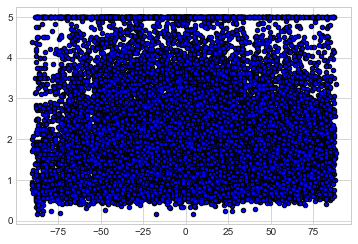

In [164]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [165]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

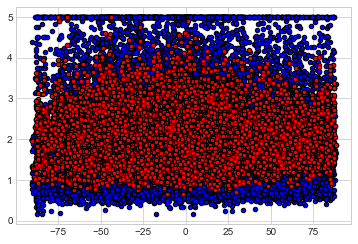

In [166]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp[:, 0], predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')